# Richard Albright
## ISYE6740
## Fall 2020
## Homework 6

## Question 1 - Ada Boost

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [43]:
Xs = np.array([
    [-1, 0, 1],
    [-0.5, 0.5, 1], 
    [0, 1, -1], 
    [0.5, 1, -1], 
    [1, 0, 1], 
    [1, -1, 1], 
    [0, -1, -1], 
    [0, 0, -1]])
df = pd.DataFrame(Xs, columns=['x1','x2','y'])
df

,x1,x2,y
0,-1.0,0.0,1.0
1,-0.5,0.5,1.0
2,0.0,1.0,-1.0
3,0.5,1.0,-1.0
4,1.0,0.0,1.0
5,1.0,-1.0,1.0
6,0.0,-1.0,-1.0
7,0.0,0.0,-1.0


In [44]:
Xs = df[['x1', 'x2']].values
y = df['y'].values

In [45]:
m, n = Xs.shape
m, n

(8, 2)

## Functions

In [46]:
def learner1(x1, x2):
    if x1 < -0.25:
        return 1
    else:
        return -1
learner1 = np.vectorize(learner1)
    
def learner2(x1, x2):
    if x2 >= 0.75:
        return 1
    else:
        return -1
learner2 = np.vectorize(learner2)

def learner3(x1, x2):
    if x1 >= 0.75:
        return 1
    else:
        return -1
learner3 = np.vectorize(learner3)

def ada_boost(x1, x2, a):
    return np.sign(
        a[0] * learner1(x1, x2) 
        + a[1] * learner2(x1, x2) 
        + a[2] * learner3(x1, x2))
    
def errors(d, p, y):
    return (d * (p != y)).sum()

def alpha(e):
    return 0.5 * np.log((1 - e)/e)

def D(d, a, y, p):
    return d * np.exp(-a * y * p)

def Z(d):
    return d.sum()

### Iteration 1

In [47]:
pred1 = learner1(Xs[:,0], Xs[:,1])
pred1

array([ 1,  1, -1, -1, -1, -1, -1, -1])

In [48]:
d1 = np.ones(m)*1/m
d1

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [49]:
e1 = errors(d1, pred1, y)
e1

0.25

In [50]:
a1 = alpha(e1)
a1

0.5493061443340549

In [51]:
D1  = D(d1, a1, y, pred1)
D1

array([0.07216878, 0.07216878, 0.07216878, 0.07216878, 0.21650635,
       0.21650635, 0.07216878, 0.07216878])

In [52]:
z1 = Z(D1)
z1

0.8660254037844386

In [53]:
table = []
table.append([e1, a1, z1] + d1.tolist())

### Iteration 2

In [54]:
d2 = D1/z1
d2

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.25      ,
       0.25      , 0.08333333, 0.08333333])

In [55]:
pred2 = learner2(Xs[:,0], Xs[:,1])
pred2

array([-1, -1,  1,  1, -1, -1, -1, -1])

In [56]:
e2 = errors(d2, pred2, y)
e2

0.8333333333333335

In [57]:
a2 = alpha(e2)
a2

-0.8047189562170507

In [58]:
D2  = D(d2, a2, y, pred2)
D2

array([0.0372678, 0.0372678, 0.0372678, 0.0372678, 0.1118034, 0.1118034,
       0.186339 , 0.186339 ])

In [59]:
z2 = Z(D2)
z2

0.74535599249993

In [60]:
table.append([e2, a2, z2] + d2.tolist())

### Iteration 3

In [61]:
d3 = D2/z2
d3

array([0.05, 0.05, 0.05, 0.05, 0.15, 0.15, 0.25, 0.25])

In [62]:
pred3 = learner3(Xs[:,0], Xs[:,1])
pred3

array([-1, -1, -1, -1,  1,  1, -1, -1])

In [63]:
e3 = errors(d3, pred3, y)
e3

0.09999999999999994

In [64]:
a3 = alpha(e3)
a3

1.09861228866811

In [65]:
D3  = D(d3, a3, y, pred3)
D3

array([0.15      , 0.15      , 0.01666667, 0.01666667, 0.05      ,
       0.05      , 0.08333333, 0.08333333])

In [66]:
z3 = Z(D3)
z3

0.5999999999999996

In [67]:
table.append([e3, a3, z3] + d3.tolist())

In [68]:
df2 = pd.DataFrame(
    table, 
    columns=[
        'e(t)', 'a(t)', 'Z(t)', 
        'Dt(1)', 'Dt(2)', 'Dt(3)', 'Dt(4)', 'Dt(5)','Dt(6)', 'Dt(7)', 'Dt(8)'])
df2.index += 1
df2.index.name = 'Iteration'
df2

,e(t),a(t),Z(t),Dt(1),Dt(2),Dt(3),Dt(4),Dt(5),Dt(6),Dt(7),Dt(8)
Iteration,,,,,,,,,,,
1,0.250000,0.549306,0.866025,0.125000,0.125000,0.125000,0.125000,0.125,0.125,0.125000,0.125000
2,0.833333,-0.804719,0.745356,0.083333,0.083333,0.083333,0.083333,0.250,0.250,0.083333,0.083333
3,0.100000,1.098612,0.600000,0.050000,0.050000,0.050000,0.050000,0.150,0.150,0.250000,0.250000


In [69]:
pred = ada_boost(Xs[:,0], Xs[:,1], [a1, a2, a3])
pred

array([ 1.,  1., -1., -1.,  1.,  1., -1., -1.])

In [70]:
x1, x2 = np.meshgrid(
    np.arange(Xs[:,0].min()-0.5, Xs[:,0].max()+0.5, 0.01), 
    np.arange(Xs[:,1].min()-0.5,Xs[:,1].max()+0.5,0.01))

In [71]:
boundary = ada_boost(x1.ravel(), x2.ravel(),  [a1, a2, a3]).reshape(x1.shape)

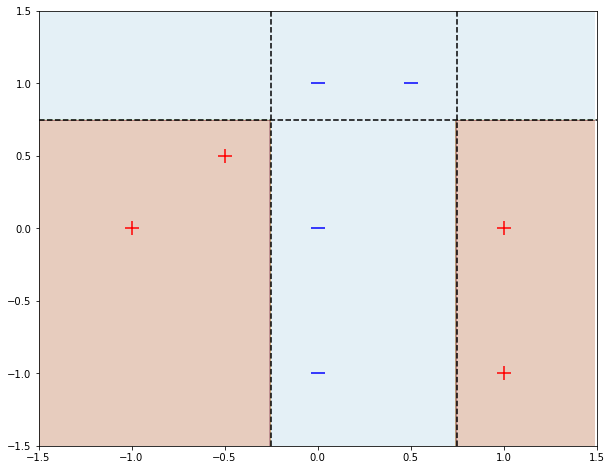

In [74]:
plt.figure(figsize=(10,8))
plt.contourf(x1, x2, boundary, cmap=plt.cm.Paired, alpha=0.3)
plt.scatter(x=Xs[pred==1,0], y=Xs[pred==1,1], marker='+', s=200, c='red')
plt.scatter(x=Xs[pred==-1,0], y=Xs[pred==-1,1], marker='_', s=200, c='blue')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.plot([-0.25, -0.25], [-1.5, 1.5], 'k--')
plt.plot([0.75, 0.75], [-1.5, 1.5], 'k--')
plt.plot([-1.5, 1.5], [0.75, 0.75], 'k--')
plt.savefig('adaboost_boundary.png')

In [73]:
accuracy_score(pred, y)

1.0